In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [37]:
df = pd.read_csv("../downloads/amz_uk_price_prediction_dataset.csv")
display(df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
print(df.describe())

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB
None


In [39]:
## Part 1 - Frequency Tables - Generate a frequency table for the product category.

frequency_table = df['category'].value_counts().reset_index()
frequency_table.columns = ['category', 'count']
display(frequency_table)

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


In [40]:
## Part 2 - Which are the top 5 most listed product categories?
top_5_categories = frequency_table.head(5)
print(top_5_categories)

                                 category   count
0                       Sports & Outdoors  836265
1                                  Beauty   19312
2  Handmade Clothing, Shoes & Accessories   19229
3                             Bath & Body   19092
4                          Birthday Gifts   18978


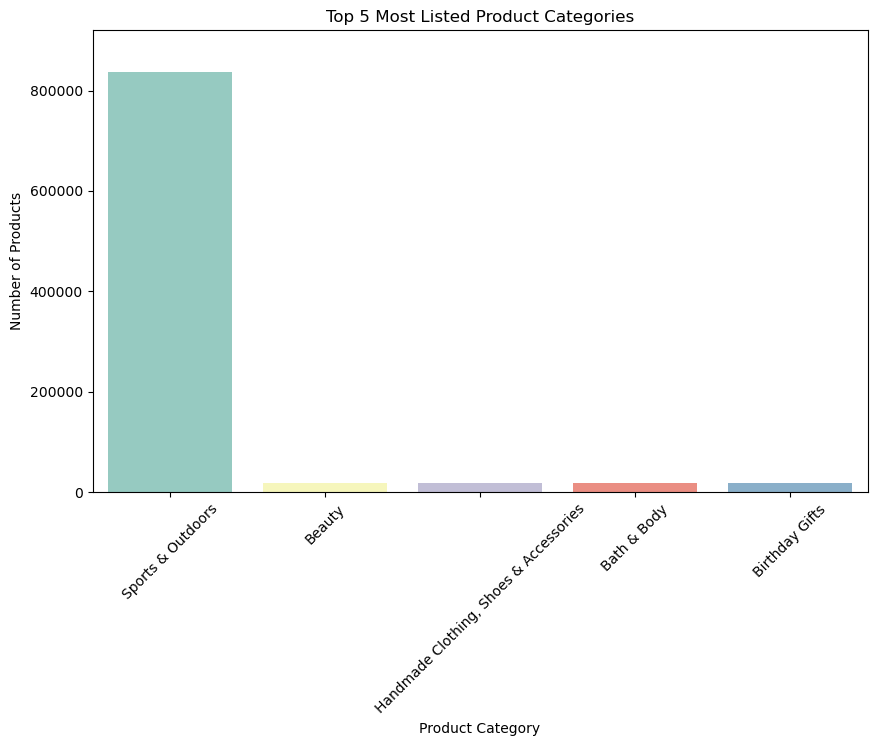

In [48]:
## 2- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

# Plotting the bar plot for the top 5 categories
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='count', data=top_5_categories, palette="Set3")
plt.title('Top 5 Most Listed Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.ylim(0, top_5_categories['count'].max() * 1.1)  # Adjust y-axis limit for better visualization
plt.show()


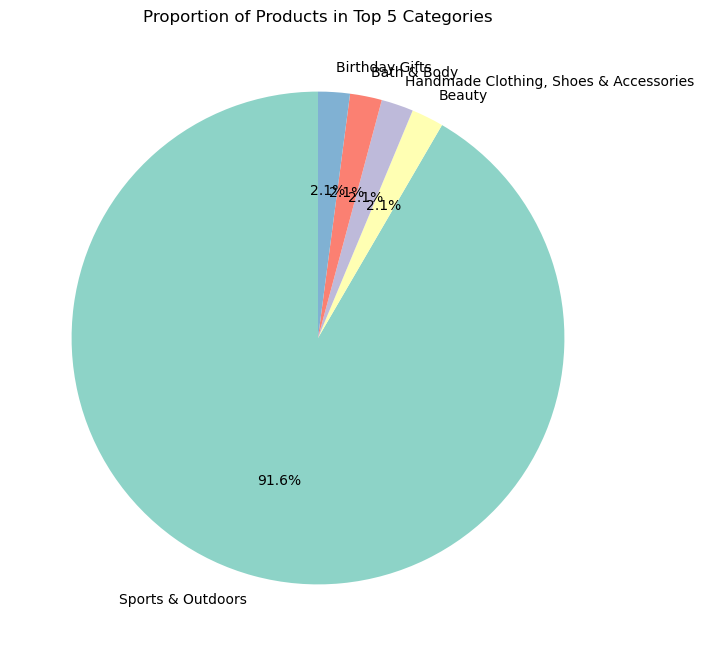

In [50]:
## 2 - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.figure(figsize=(8, 8))
top_5_categories.set_index('category')['count'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", n_colors=5))
plt.title('Proportion of Products in Top 5 Categories')
plt.ylabel('')  # Hide the y-label for better visualization
plt.show()

In [ ]:
## Part 2

In [67]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [68]:
## 1 - Calculate the mean, median, and mode for the price of products.

price_mean = df['price'].mean()
price_median = df['price'].median() 
price_mode = df['price'].mode() 
print("Mean Price: ", price_mean)
print("Median Price: ", price_median)
print("Mode Price: ", price_mode)



# Average price is $89.24 but mode is $9.99

Mean Price:  89.24380943923663
Median Price:  19.09
Mode Price:  0    9.99
Name: price, dtype: float64


In [69]:
## 2 - Determine the variance, standard deviation, range, and interquartile range for product price.

price_std = df['price'].std()
price_var = df['price'].var()
price_min = df['price'].min()
price_max = df['price'].max()

print("Std Price: ", price_mean)
print("Var Price: ", price_median)
print("Range of Price: ", price_min, "to ", price_max)

Std Price:  89.24380943923663
Var Price:  19.09
Range of Price:  0.0 to  100000.0


<Axes: >

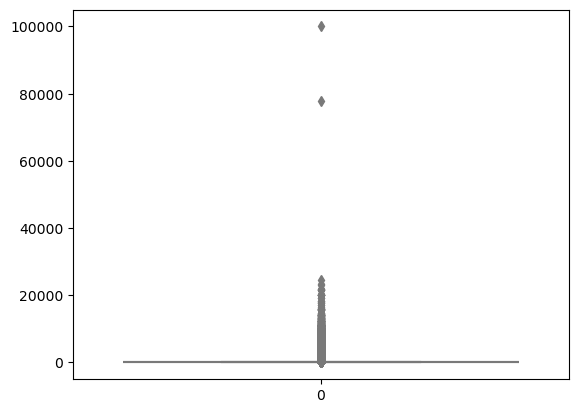

In [76]:
## Are there products that are priced significantly higher than the rest? 
## Use a box plot to showcase the spread and potential outliers in product pricing.


sns.boxplot(data = df['price'], color="lightblue")

In [77]:
df = df.dropna(subset=['price'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


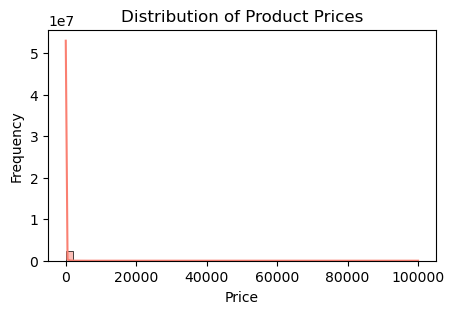

In [83]:
##Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
##If its hard to read these diagrams, think why this is, and explain how it could be solved..

plt.figure(figsize=(5, 3))
sns.histplot(df['price'], kde=True, bins=50, color="salmon")
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##hard to read because there are many null values

In [ ]:
## PART 3

In [84]:
## 1 - Calculate the mean, median, and mode for the rating of products.

reviews_mean = df['reviews'].mean()
reviews_median = df['reviews'].median() 
reviews_mode = df['reviews'].mode() 
print("Mean reviews: ", reviews_mean)
print("Median reviews: ", reviews_median)
print("Mode reviews: ", reviews_mode)

##customers don't rate the products


Mean reviews:  480.6277569914853
Median reviews:  0.0
Mode reviews:  0    0
Name: reviews, dtype: int64


In [86]:
review_frequency_table = df['reviews'].value_counts().reset_index()
review_frequency_table.columns = ['category', 'count']
display(review_frequency_table)

,category,count
0,0,1225641
1,1,90033
2,2,54452
3,3,39922
4,4,30720
...,...,...
19441,13246,1
19442,16044,1
19443,25872,1
19444,8503,1


In [88]:
## 2 - Determine the variance, standard deviation, range, and interquartile range for product reviews.
reviews_std = df['reviews'].std()
reviews_var = df['reviews'].var()
reviews_min = df['reviews'].min()
reviews_max = df['reviews'].max()

print("Std reviews: ", reviews_mean)
print("Var reviews: ", reviews_median)
print("Range of reviews: ", reviews_min, "to ", reviews_max)

Std reviews:  480.6277569914853
Var reviews:  0.0
Range of reviews:  0 to  1356658


In [91]:
## 3 - Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_reviews = df['reviews'].skew()
kurtosis_reviews = df['reviews'].kurtosis()

skewness_reviews, kurtosis_reviews

#right-skewed and extrememly heavy tailed distribution

(102.81782179557166, 17741.01460473757)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


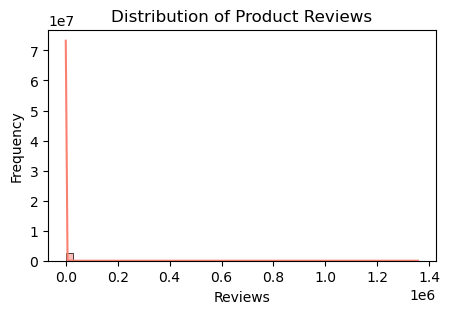

In [93]:
## 4 - Plot a histogram to visualize the distribution of product ratings. 
## Is there a specific rating that is more common?

plt.figure(figsize=(5, 3))
sns.histplot(df['reviews'], kde=True, bins=50, color="salmon")
plt.title('Distribution of Product Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

##hard to read because there are many null values